In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

from category_encoders import BinaryEncoder, OneHotEncoder, JamesSteinEncoder, HashingEncoder, CountEncoder

In [ ]:
pd.options.display.max_rows=100
pd.options.display.max_columns=10000

## Data Cleaning

In [2]:
data=pd.read_excel('files/Turbo_scraped.xlsx')
df = data.copy()
df.head()

,Unnamed: 0,price,brand,model,released_at,city,ban,color,engine,distance,gearbox,transmitter,is_new
0,0,13 800 AZN,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,1.5 L/109 a.g./Benzin,153 200 km,Avtomat,Ön,Xeyr
1,1,29 500 USD,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,3.6 L/300 a.g./Benzin,198 000 km,Avtomat,Tam,Xeyr
2,2,34 900 USD,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,2.4 L/137 a.g./Dizel,0 km,Mexaniki,Tam,Bəli
3,3,56 400 EUR,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,2.0 L/280 a.g./Benzin,0 km,Avtomat,Tam,Bəli
4,4,47 000 USD,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,3.0 L/306 a.g./Benzin,160 307 km,Avtomat,Tam,Xeyr


In [3]:
df.shape

(11249, 13)

In [4]:
df.isna().sum()

Unnamed: 0     0
price          0
brand          0
model          0
released_at    0
city           0
ban            0
color          0
engine         0
distance       0
gearbox        0
transmitter    0
is_new         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   11249 non-null  int64 
 1   price        11249 non-null  object
 2   brand        11249 non-null  object
 3   model        11249 non-null  object
 4   released_at  11249 non-null  int64 
 5   city         11249 non-null  object
 6   ban          11249 non-null  object
 7   color        11249 non-null  object
 8   engine       11249 non-null  object
 9   distance     11249 non-null  object
 10  gearbox      11249 non-null  object
 11  transmitter  11249 non-null  object
 12  is_new       11249 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [6]:
for x in df.columns:
    print(df[x].unique())
    print("\n")

[    0     1     2 ... 11246 11247 11248]


['13 800 AZN' '29 500 USD' '34 900 USD' ... '11 250 AZN' '55 700 USD'
 '147 000 AZN']


['Nissan' 'Porsche' 'Mitsubishi' 'Alfa Romeo' 'BMW' 'Mercedes' 'Opel'
 'Hyundai' 'Toyota' 'LADA (VAZ)' 'Chevrolet' 'GAZ' 'Kia' 'Audi' 'Lexus'
 'ZX Auto' 'Fiat' 'Jaguar' 'Volkswagen' 'Land Rover' 'Yamaha' 'Daewoo'
 'Subaru' 'Ford' 'Changan' 'Volvo' 'Honda' 'Jeep' 'Tofas' 'Mazda'
 'SamAuto' 'Hongqi' 'Ravon' 'Lifan' 'Suzuki' 'Geely' 'KamAz' 'Jetour'
 'Bentley' 'Renault' 'Haval' 'SEAT' 'Saipa' 'Scania' 'Baic'
 'Mercedes-Maybach' 'Chery' 'Bajaj' 'DAF' 'Iran Khodro' 'Dodge' 'Haima'
 'Infiniti' 'Ssang Yong' 'Khazar' 'Great Wall' 'GMC' 'DongFeng' 'Wuling'
 'DFSK' 'Lamborghini' 'Skoda' 'Isuzu' 'UAZ' 'Aston Martin' 'HOWO'
 'Cadillac' 'MG' 'FAW' 'Bestune' 'Iveco' 'McLaren' 'Mini' 'Lincoln'
 'Peugeot' 'Foton' 'C.Moto' 'Kuba' 'Soueast' 'Moskvich' 'ZIL' 'ZAZ'
 'Chrysler' 'Tesla' 'Skywell' 'Abarth' 'Shacman' 'Dacia' 'Genesis'
 'Rolls-Royce' 'Smart' 'JAC' 'MAZ' 'KAIYI' 'H

In [7]:
dictyu={}
for x in df.columns:
    dictyu[x]=df[x].unique().shape[0]
print(dictyu)

{'Unnamed: 0': 11249, 'price': 1217, 'brand': 98, 'model': 716, 'released_at': 55, 'city': 58, 'ban': 19, 'color': 17, 'engine': 1014, 'distance': 2271, 'gearbox': 4, 'transmitter': 3, 'is_new': 2}


#### Deleting AZN for making price col numeric

In [9]:
df['price']

0         13 800 AZN
1         29 500 USD
2         34 900 USD
3         56 400 EUR
4         47 000 USD
            ...     
11244     39 900 USD
11245     55 700 USD
11246     13 000 AZN
11247     45 500 AZN
11248    147 000 AZN
Name: price, Length: 11249, dtype: object

In [10]:
usd=1.7
eur=1.81
df['price']=[ int(x[: x.find(" ",4)].replace(" ",""))*usd if ('USD'  in x) else int(x[: x.find(" ",4)].replace(" ",""))*eur if ('EUR'  in x) else int(x[: x.find(" ",4)].replace(" ","")) for x in df['price']]  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11249 non-null  int64  
 1   price        11249 non-null  float64
 2   brand        11249 non-null  object 
 3   model        11249 non-null  object 
 4   released_at  11249 non-null  int64  
 5   city         11249 non-null  object 
 6   ban          11249 non-null  object 
 7   color        11249 non-null  object 
 8   engine       11249 non-null  object 
 9   distance     11249 non-null  object 
 10  gearbox      11249 non-null  object 
 11  transmitter  11249 non-null  object 
 12  is_new       11249 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


#### Deleting km for making distance col numeric

In [12]:
a=[x[:x.find(" ",3)] if x!='0 km' else '0' for x in df['distance'] ]    
  [x for x in list(map(lambda x : re.findall('[^0-9]',x.replace(" ","")),a)) if x!=[]]

In [13]:
a=[x[:x.find(" ",4)] if x!='0 km' else '0' for x in df['distance'] ]  
df['distance']=list(map(lambda x : int(x.replace(" ","").replace("k","")),a))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11249 non-null  int64  
 1   price        11249 non-null  float64
 2   brand        11249 non-null  object 
 3   model        11249 non-null  object 
 4   released_at  11249 non-null  int64  
 5   city         11249 non-null  object 
 6   ban          11249 non-null  object 
 7   color        11249 non-null  object 
 8   engine       11249 non-null  object 
 9   distance     11249 non-null  int64  
 10  gearbox      11249 non-null  object 
 11  transmitter  11249 non-null  object 
 12  is_new       11249 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


#### Deleting 'Unnamed: 0'  col, because we will not need it

In [15]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [16]:
df.head()

,price,brand,model,released_at,city,ban,color,engine,distance,gearbox,transmitter,is_new
0,13800.0,Nissan,Tiida,2012,Bakı,Hetçbek,Gümüşü,1.5 L/109 a.g./Benzin,153200,Avtomat,Ön,Xeyr
1,50150.0,Porsche,Cayenne,2012,Bakı,Offroader / SUV,Qara,3.6 L/300 a.g./Benzin,198000,Avtomat,Tam,Xeyr
2,59330.0,Mitsubishi,L 200,2022,Bakı,Pikap,Gümüşü,2.4 L/137 a.g./Dizel,0,Mexaniki,Tam,Bəli
3,102084.0,Alfa Romeo,Stelvio,2022,Bakı,Offroader / SUV,Göy,2.0 L/280 a.g./Benzin,0,Avtomat,Tam,Bəli
4,79900.0,BMW,X5,2014,Bakı,Offroader / SUV,Ağ,3.0 L/306 a.g./Benzin,160307,Avtomat,Tam,Xeyr


#### Checking outliers

[None]

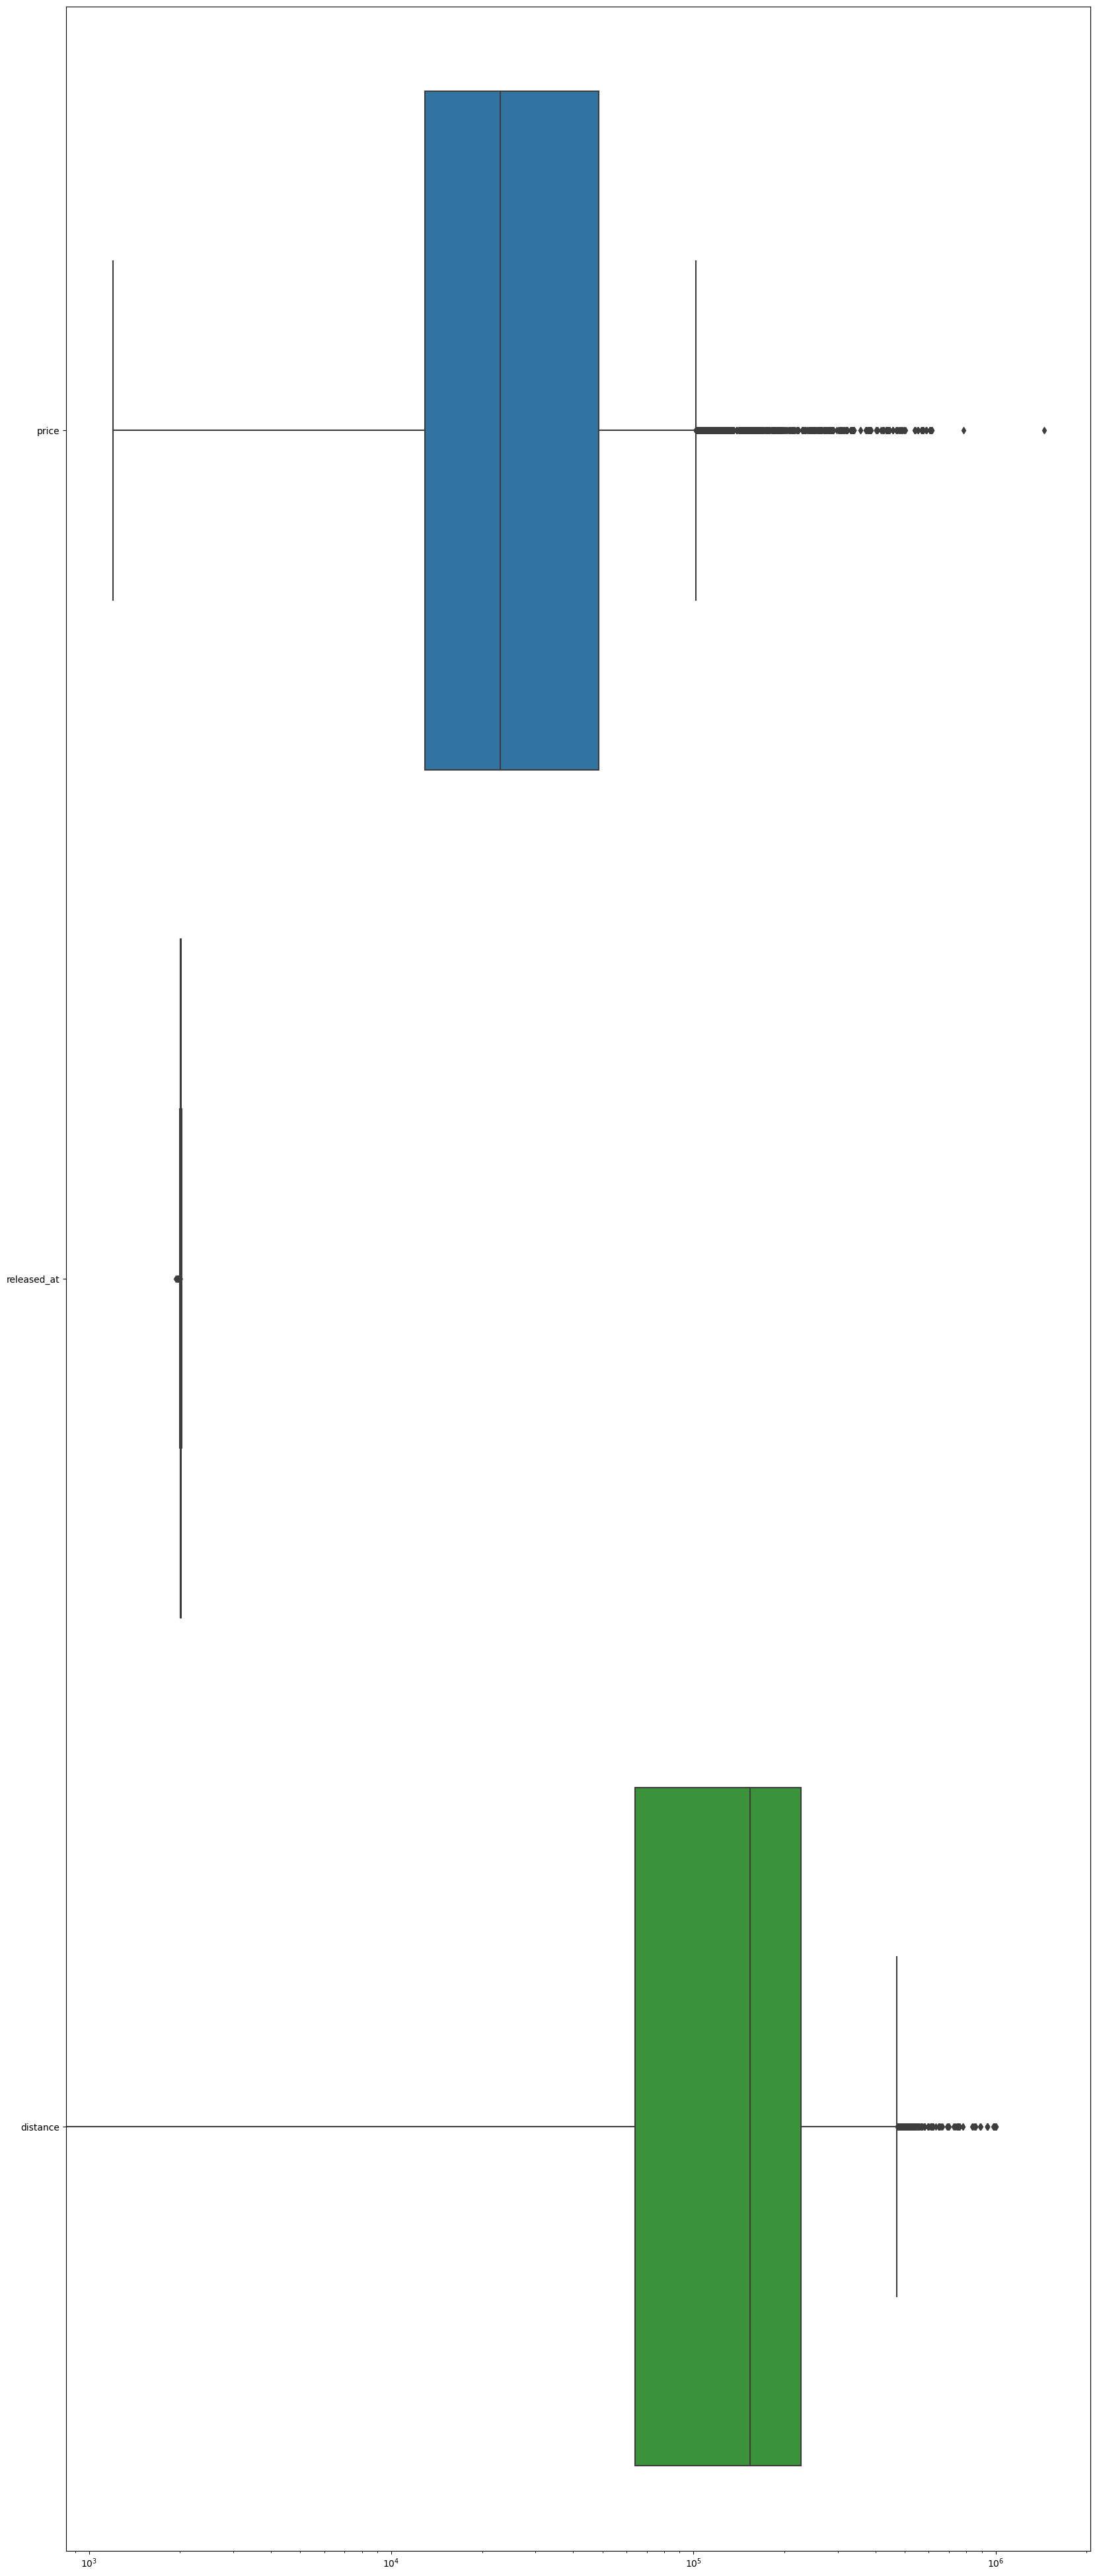

In [17]:
plt.figure(figsize=(20,50))
ax=sns.boxplot(data=df,orient='h')
ax.set(xscale='log')

## Splitting data into train and test sets

In [18]:
X=df.drop("price",axis=1)
y=pd.DataFrame(df["price"])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


## Pipeline Transfromer

In [ ]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', StandardScaler())])
cat_Pipeline = Pipeline([('encoder', LabelEncoder())])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', RandomForestRegressor())
]
)

param_grid = {
    'transformer__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'transformer__cat__scaler': [LabelEncoder(), OneHotEncoder(),BinaryEncoder(),JamesSteinEncoder(),HashingEncoder(),CountEncoder()],
    'predictor' : [RandomForestRegressor(),GradientBoostingRegressor(),SVR(),GaussianNB(),KNeighborsRegressor()]
}


scoring = {'mse': make_scorer(mean_squared_error), 'r2': make_scorer(r2_score)}

grid_search = GridSearchCV(final_pipeline,
                          cv=5,
                          return_train_score=True,
                          scoring=scoring,
                          param_grid=param_grid,
                          refit=False)


K=grid_search.fit(X_train, y_train)

In [20]:
param_grid = {
    'transformer__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'transformer__cat__scaler': [LabelEncoder(), OneHotEncoder(),BinaryEncoder(),JamesSteinEncoder(),HashingEncoder(),CountEncoder()],
    'predictor' : [RandomForestRegressor(),GradientBoostingRegressor(),SVR(),GaussianNB(),KNeighborsRegressor()]
}


scoring = {'mse': make_scorer(mean_squared_error), 'r2': make_scorer(r2_score)}

grid_search = GridSearchCV(final_pipeline,
                          cv=5,
                          return_train_score=True,
                          scoring=scoring,
                          param_grid=param_grid,refit=False)

In [21]:
K=grid_search.fit(X_train, y_train)

### Analyzing Results

In [30]:
T=pd.DataFrame(K.cv_results_)

In [45]:
T.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_predictor,param_transformer__cat__scaler,param_transformer__num__scaler,params,split0_test_mse,split1_test_mse,split2_test_mse,split3_test_mse,split4_test_mse,mean_test_mse,std_test_mse,rank_test_mse,split0_train_mse,split1_train_mse,split2_train_mse,split3_train_mse,split4_train_mse,mean_train_mse,std_train_mse,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
85,19.777781,0.107582,9.895963,0.074077,KNeighborsRegressor(),HashingEncoder(max_process=6),RobustScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",1.243846e+09,9.467117e+08,2.432208e+09,1.228541e+09,1.487777e+09,1.467817e+09,5.117452e+08,20,9.571204e+08,1.001815e+09,8.299055e+08,9.728905e+08,8.747529e+08,9.272969e+08,6.444718e+07,0.662852,0.753108,0.502054,0.678315,0.608416,0.640949,0.083433,41,0.765690,0.752560,0.780799,0.759909,0.784410,0.768674,0.012166
86,19.629705,0.125645,9.864759,0.097314,KNeighborsRegressor(),HashingEncoder(max_process=6),MinMaxScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",1.405620e+09,1.282355e+09,2.592803e+09,1.529964e+09,1.529938e+09,1.668136e+09,4.713681e+08,19,1.073640e+09,1.123962e+09,8.721949e+08,1.082065e+09,9.930352e+08,1.028979e+09,8.911527e+07,0.619003,0.665576,0.469176,0.599389,0.597320,0.590093,0.065258,42,0.737165,0.722391,0.769629,0.732967,0.755258,0.743482,0.016838
87,0.115614,0.007651,0.087513,0.007666,KNeighborsRegressor(),CountEncoder(combine_min_nan_groups=True),StandardScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",7.715981e+08,9.165843e+08,2.078538e+09,9.715348e+08,1.160443e+09,1.179740e+09,4.663454e+08,27,7.403556e+08,7.898407e+08,5.792278e+08,7.391815e+08,6.849210e+08,7.067053e+08,7.186599e+07,0.790856,0.760965,0.574461,0.745610,0.694571,0.713293,0.076102,34,0.818755,0.804916,0.847010,0.817584,0.831195,0.823892,0.014241
88,0.111103,0.003436,0.081247,0.006251,KNeighborsRegressor(),CountEncoder(combine_min_nan_groups=True),RobustScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",7.713459e+08,9.199921e+08,2.085738e+09,9.721964e+08,1.162311e+09,1.182317e+09,4.687070e+08,26,7.414485e+08,7.908206e+08,5.811259e+08,7.392190e+08,6.848629e+08,7.074954e+08,7.153148e+07,0.790925,0.760076,0.572987,0.745437,0.694079,0.712701,0.076553,35,0.818488,0.804674,0.846509,0.817575,0.831210,0.823691,0.014165
89,0.107269,0.007040,0.081245,0.006250,KNeighborsRegressor(),CountEncoder(combine_min_nan_groups=True),MinMaxScaler(),"{'predictor': KNeighborsRegressor(), 'transfor...",7.788862e+08,9.233510e+08,2.100797e+09,9.816729e+08,1.170237e+09,1.190989e+09,4.719013e+08,25,7.467107e+08,8.064015e+08,5.872171e+08,7.421409e+08,6.892693e+08,7.143479e+08,7.360006e+07,0.788881,0.759200,0.569904,0.742956,0.691993,0.710587,0.077043,36,0.817199,0.800826,0.844900,0.816854,0.830124,0.821980,0.014753


In [51]:
T.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_predictor', 'param_transformer__cat__scaler',
       'param_transformer__num__scaler', 'params', 'split0_test_mse',
       'split1_test_mse', 'split2_test_mse', 'split3_test_mse',
       'split4_test_mse', 'mean_test_mse', 'std_test_mse', 'rank_test_mse',
       'split0_train_mse', 'split1_train_mse', 'split2_train_mse',
       'split3_train_mse', 'split4_train_mse', 'mean_train_mse',
       'std_train_mse', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2',
       'split3_test_r2', 'split4_test_r2', 'mean_test_r2', 'std_test_r2',
       'rank_test_r2', 'split0_train_r2', 'split1_train_r2', 'split2_train_r2',
       'split3_train_r2', 'split4_train_r2', 'mean_train_r2', 'std_train_r2'],
      dtype='object')

In [70]:
df2=T[['rank_test_r2', 'rank_test_mse', 'mean_test_r2','mean_test_mse','param_predictor', 'param_transformer__cat__scaler','param_transformer__num__scaler']]

In [71]:
df2.sort_values(by=['rank_test_r2','rank_test_mse'],ascending=[True,False])

,rank_test_r2,rank_test_mse,mean_test_r2,mean_test_mse,param_predictor,param_transformer__cat__scaler,param_transformer__num__scaler
4,1,60,0.906270,4.115777e+08,RandomForestRegressor(),OneHotEncoder(),RobustScaler()
5,2,59,0.905035,4.157951e+08,RandomForestRegressor(),OneHotEncoder(),MinMaxScaler()
3,3,58,0.904397,4.180685e+08,RandomForestRegressor(),OneHotEncoder(),StandardScaler()
11,4,57,0.903953,4.202375e+08,RandomForestRegressor(),JamesSteinEncoder(),MinMaxScaler()
10,5,56,0.903164,4.234375e+08,RandomForestRegressor(),JamesSteinEncoder(),RobustScaler()
9,6,55,0.903066,4.239621e+08,RandomForestRegressor(),JamesSteinEncoder(),StandardScaler()
8,7,54,0.889875,4.745118e+08,RandomForestRegressor(),BinaryEncoder(),MinMaxScaler()
17,8,53,0.887321,4.809708e+08,RandomForestRegressor(),CountEncoder(combine_min_nan_groups=True),MinMaxScaler()
6,9,52,0.886877,4.862754e+08,RandomForestRegressor(),BinaryEncoder(),StandardScaler()
7,10,51,0.886659,4.871424e+08,RandomForestRegressor(),BinaryEncoder(),RobustScaler()


In [86]:
import math

In [87]:
math.sqrt(4.115777e+08)

20287.37784929339

In [88]:
4.115777e+08>4.413171e+09

False

### Difference between MAE best and worst

In [80]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', RobustScaler())])
cat_Pipeline = Pipeline([('scaler', OneHotEncoder())])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', RandomForestRegressor())
]
)

In [81]:
n=final_pipeline.fit(X_train, y_train).predict(X_test)

In [82]:
mean_absolute_error(y_test, n)  # Best

3486.043669269589

In [83]:
num_col=X.select_dtypes(include='number').columns
cat_col=X.select_dtypes(include='object').columns


num_Pipeline = Pipeline([('scaler', MinMaxScaler())])
cat_Pipeline = Pipeline([('scaler', HashingEncoder(max_process=6))])


preprocessor=ColumnTransformer(
    [
    ('num',num_Pipeline,num_col),
    ('cat',cat_Pipeline,cat_col)
    ]
)


final_pipeline=Pipeline([
    ('transformer',preprocessor),
    ('predictor', SVR())
]
)

n=final_pipeline.fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_test, n)  # worst

30367.456806245